In [1]:
import pandas as pd
import numpy as np

In [15]:
from random import randint
from math import sqrt

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
from sklearn import datasets

### Выбор подходящего датасета

Для работы взят сет, содержащий данные о химическом составе вин, произведенных из нескольких разных сортов винограда, выращенного в одном регионе Италии. С помощью метода k-means можно кластеризовать полученные данные и выяснить, сколько сортов винограда использовались в производстве.

In [5]:
wine = datasets.load_wine()

In [85]:
wineset = pd.DataFrame(wine['data'])

In [86]:
wineset.columns = wine.feature_names

In [87]:
wineset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Классификатор

In [88]:
class k_means:
    def __init__(self, K, max_iter):
        self.K = K
        self.max_iter = max_iter
    
    def fit(self, X):
        X = np.array(X)
        M, N = X.shape
    
        self.centroids = np.array([[0.0] * N for _ in range(self.K)])
        for j in range(self.K):
            self.centroids[j] = X[randint(0, M - 1)]
        
        for iteration in range(self.max_iter):
            centroids_old = [tuple(self.centroids[j]) for j in range(self.K)]
            
            dists = np.zeros((M, self.K)).astype(np.float32)
            for i in range(M):
                for j in range(self.K):
                    dists[i][j] = sum((X[i] - self.centroids[j]) ** 2)
            
            self.clusters = np.argmin(dists, axis=1)
            for j in range(self.K):
                for n in range(N):
                    self.centroids[j][n] = sum(X[(self.clusters == j)][:, n]) / len(X[(self.clusters == j)])
            
            if np.all(self.centroids == centroids_old):
                print('iteration', str(iteration), ': no changes')
                break

### Определение оптимального числа кластеров с помощью библиотеки sklearn

In [9]:
from sklearn.cluster import KMeans
%matplotlib inline

In [10]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(wineset)
    distortions.append(kmeanModel.inertia_)

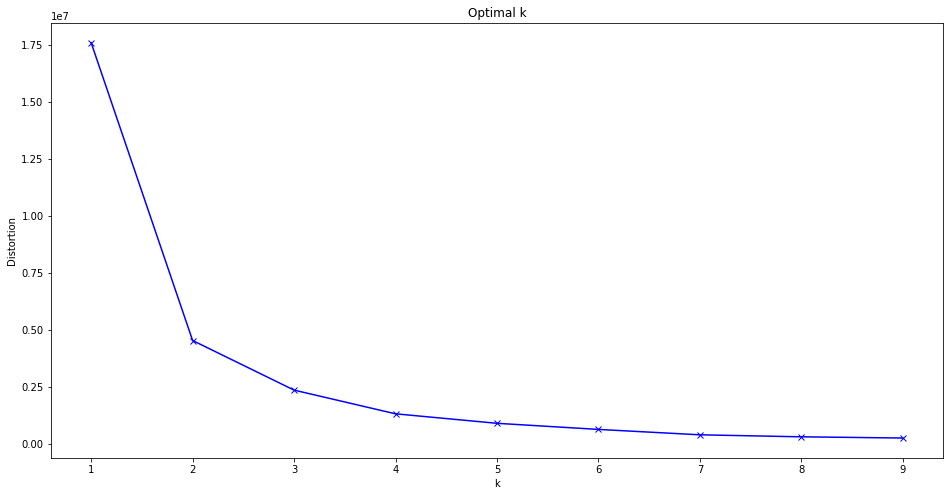

In [11]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal k')
plt.show()

Точкой перегиба на графике можно считать точку 3, это означает что дальнейшее добавление кластеров будет излишним.

### Кластеризация 

In [89]:
model = k_means(3, 100)
model.fit(wineset)
clusters = pd.Series(model.clusters)

iteration 8 : no changes


Полученное разбиение вин на группы по сортам:

In [90]:
clusters.value_counts().sort_index()

0    69
1    47
2    62
dtype: int64

Разбиение по сортам, взятое из самого датасета:

In [62]:
pd.Series(wine.target).value_counts().sort_index()

0    59
1    71
2    48
dtype: int64

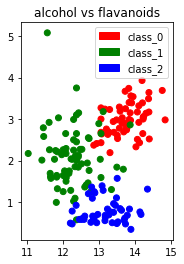

In [58]:
colors = np.array(['red', 'green', 'blue'])
wine_targets_legend = np.array(wine.target_names)
red_patch = mpatches.Patch(color='red', label='class_0')
green_patch = mpatches.Patch(color='green', label='class_1')
blue_patch = mpatches.Patch(color='blue', label='class_2')


plt.subplot(1, 2, 1)
plt.scatter(wineset.alcohol, wineset.flavanoids, c=colors[wine.target])
plt.title('alcohol vs flavanoids')
plt.legend(handles=[red_patch, green_patch, blue_patch])